In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from itertools import cycle, islice
from matplotlib import cm
sb.set()

In [2]:
data = pd.read_csv('mobiles.csv', header = None,encoding_errors='replace')
data. columns=data. iloc[0]
data = data.iloc[1: , :]

data.head()




,NaN,names,images_links,stars,rating&reviews,price_details,memory,camara_info,display,battery,processor,warranty
1,540.0,SAMSUNG GURU MUSIC 2,https://rukminim1.flixcart.com/image/312/312/k...,4.1,"3,282 Ratings & 266 Reviews","₹1,995\n₹2,34014% off",8 MB RAM | 0 GB ROM | Expandable Upto 16 GB,0MP | 0MP Front Camera,5.08 cm (2 inch) QVGA Display,800 mAh Battery,0 0 0 208MHz Processor,1 Year Manufacturer's Warranty
2,644.0,ANGAGE ELITE,https://rukminim1.flixcart.com/image/312/312/l...,3.8,15 Ratings & 2 Reviews,₹879,64 MB RAM | 64 MB ROM | Expandable Upto 32 GB,0.3MP Rear Camera,4.5 cm (1.77 inch) Display,2500 mAh Battery,NaN,NaN
3,1045.0,"IQOO 9T 5G (ALPHA, 128 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4,45 Ratings & 7 Reviews,"₹48,999\n₹49,9992% off",8 GB RAM | 128 GB ROM,50MP Rear Camera,17.22 cm (6.78 inch) Display,4700 mAh Battery,NaN,NaN
4,676.0,"IQOO Neo 6 5G (Cyber Rage, 128 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.4,970 Ratings & 118 Reviews,"₹30,200\n₹34,99013% off",8 GB RAM | 128 GB ROM,64MP Rear Camera,16.81 cm (6.62 inch) Display,4700 mAh Battery,NaN,NaN
5,1120.0,"IQOO Neo 6 5G (Cyber Rage, 128 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.4,970 Ratings & 118 Reviews,"₹29,999",8 GB RAM | 128 GB ROM,64MP Rear Camera,16.81 cm (6.62 inch) Display,4700 mAh Battery,NaN,NaN


In [3]:
del data[data.columns[0]]
data.head()

,names,images_links,stars,rating&reviews,price_details,memory,camara_info,display,battery,processor,warranty
1,SAMSUNG GURU MUSIC 2,https://rukminim1.flixcart.com/image/312/312/k...,4.1,"3,282 Ratings & 266 Reviews","₹1,995\n₹2,34014% off",8 MB RAM | 0 GB ROM | Expandable Upto 16 GB,0MP | 0MP Front Camera,5.08 cm (2 inch) QVGA Display,800 mAh Battery,0 0 0 208MHz Processor,1 Year Manufacturer's Warranty
2,ANGAGE ELITE,https://rukminim1.flixcart.com/image/312/312/l...,3.8,15 Ratings & 2 Reviews,₹879,64 MB RAM | 64 MB ROM | Expandable Upto 32 GB,0.3MP Rear Camera,4.5 cm (1.77 inch) Display,2500 mAh Battery,NaN,NaN
3,"IQOO 9T 5G (ALPHA, 128 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4,45 Ratings & 7 Reviews,"₹48,999\n₹49,9992% off",8 GB RAM | 128 GB ROM,50MP Rear Camera,17.22 cm (6.78 inch) Display,4700 mAh Battery,NaN,NaN
4,"IQOO Neo 6 5G (Cyber Rage, 128 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.4,970 Ratings & 118 Reviews,"₹30,200\n₹34,99013% off",8 GB RAM | 128 GB ROM,64MP Rear Camera,16.81 cm (6.62 inch) Display,4700 mAh Battery,NaN,NaN
5,"IQOO Neo 6 5G (Cyber Rage, 128 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.4,970 Ratings & 118 Reviews,"₹29,999",8 GB RAM | 128 GB ROM,64MP Rear Camera,16.81 cm (6.62 inch) Display,4700 mAh Battery,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 1 to 1148
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   names           943 non-null    object
 1   images_links    1143 non-null   object
 2   stars           922 non-null    object
 3   rating&reviews  922 non-null    object
 4   price_details   1143 non-null   object
 5   memory          943 non-null    object
 6   camara_info     943 non-null    object
 7   display         943 non-null    object
 8   battery         943 non-null    object
 9   processor       629 non-null    object
 10  warranty        616 non-null    object
dtypes: object(11)
memory usage: 98.8+ KB


In [5]:
data.describe()

,names,images_links,stars,rating&reviews,price_details,memory,camara_info,display,battery,processor,warranty
count,943,1143,922,922,1143,943,943,943,943,629,616
unique,664,807,15,442,659,110,136,110,130,121,84
top,itel it2163S,https://rukminim1.flixcart.com/image/312/312/l...,4.3,321 Ratings & 48 Reviews,₹849,4 MB RAM | 4 MB ROM | Expandable Upto 32 GB,0.3MP Rear Camera,16.76 cm (6.6 inch) Full HD+ Display,5000 mAh Battery,9 Indian Input Language Support,1 Year on Handset and 6 Months on Accessories
freq,42,41,210,42,52,59,136,78,146,42,104


In [6]:
columns = list(data.columns)
columns

['names',
 'images_links',
 'stars',
 'rating&reviews',
 'price_details',
 'memory',
 'camara_info',
 'display',
 'battery',
 'processor',
 'warranty']

In [7]:
dataclean = data.drop(['images_links','rating&reviews','warranty'],axis='columns')
dataclean=dataclean.dropna(axis=0)
dataclean=dataclean.dropna()
dataclean.head()

,names,stars,price_details,memory,camara_info,display,battery,processor
1,SAMSUNG GURU MUSIC 2,4.1,"₹1,995\n₹2,34014% off",8 MB RAM | 0 GB ROM | Expandable Upto 16 GB,0MP | 0MP Front Camera,5.08 cm (2 inch) QVGA Display,800 mAh Battery,0 0 0 208MHz Processor
247,itel it2163S,4.1,₹989\n₹9991% off,4 MB RAM | 4 MB ROM | Expandable Upto 32 GB,1200 mAh Lithium Ion Battery,4.57 cm (1.8 inch) Quarter QVGA Display,7 Days Battery Backup with 1200mAh with Super ...,9 Indian Input Language Support
248,itel it2163S,4.1,₹989\n₹9991% off,4 MB RAM | 4 MB ROM | Expandable Upto 32 GB,1200 mAh Lithium Ion Battery,4.57 cm (1.8 inch) Quarter QVGA Display,7 Days Battery Backup with 1200mAh with Super ...,9 Indian Input Language Support
249,itel it2163S,4.1,₹989\n₹9991% off,4 MB RAM | 4 MB ROM | Expandable Upto 32 GB,1200 mAh Lithium Ion Battery,4.57 cm (1.8 inch) Quarter QVGA Display,7 Days Battery Backup with 1200mAh with Super ...,9 Indian Input Language Support
250,itel it2163S,4.1,₹989\n₹9991% off,4 MB RAM | 4 MB ROM | Expandable Upto 32 GB,1200 mAh Lithium Ion Battery,4.57 cm (1.8 inch) Quarter QVGA Display,7 Days Battery Backup with 1200mAh with Super ...,9 Indian Input Language Support


#### Here we convert Rupee (₹) to SGD ($) 

In [8]:
#separating price details column into two
new = dataclean["price_details"].str.split("\n", n = 1, expand = True)
 
#original price
dataclean["original price(₹)"]= new[0]
 
#deleting price
dataclean["delete"]= new[1]
#deleted price
dataclean = dataclean.drop(['delete','price_details'],axis = 'columns')
dataclean['original price(₹)'] = dataclean['original price(₹)'].str.replace(r'₹', '')
dataclean['original price(₹)'] = dataclean['original price(₹)'].str.replace(r',', '').astype(int)
dataclean['original price(SGD)'] = dataclean['original price(₹)'].multiply(0.016274)
dataclean['original price(SGD)'] = dataclean['original price(SGD)'].round()
dataclean = dataclean.drop(['original price(₹)'],axis = 'columns')
#changing stars to float
dataclean['stars'] = dataclean['stars'].astype(float)

dataclean.head()


,names,stars,memory,camara_info,display,battery,processor,original price(SGD)
1,SAMSUNG GURU MUSIC 2,4.1,8 MB RAM | 0 GB ROM | Expandable Upto 16 GB,0MP | 0MP Front Camera,5.08 cm (2 inch) QVGA Display,800 mAh Battery,0 0 0 208MHz Processor,32.0
247,itel it2163S,4.1,4 MB RAM | 4 MB ROM | Expandable Upto 32 GB,1200 mAh Lithium Ion Battery,4.57 cm (1.8 inch) Quarter QVGA Display,7 Days Battery Backup with 1200mAh with Super ...,9 Indian Input Language Support,16.0
248,itel it2163S,4.1,4 MB RAM | 4 MB ROM | Expandable Upto 32 GB,1200 mAh Lithium Ion Battery,4.57 cm (1.8 inch) Quarter QVGA Display,7 Days Battery Backup with 1200mAh with Super ...,9 Indian Input Language Support,16.0
249,itel it2163S,4.1,4 MB RAM | 4 MB ROM | Expandable Upto 32 GB,1200 mAh Lithium Ion Battery,4.57 cm (1.8 inch) Quarter QVGA Display,7 Days Battery Backup with 1200mAh with Super ...,9 Indian Input Language Support,16.0
250,itel it2163S,4.1,4 MB RAM | 4 MB ROM | Expandable Upto 32 GB,1200 mAh Lithium Ion Battery,4.57 cm (1.8 inch) Quarter QVGA Display,7 Days Battery Backup with 1200mAh with Super ...,9 Indian Input Language Support,16.0


In [9]:
new = dataclean["names"].str.split("(", n = 1, expand = True)
 
#phone name
dataclean["phone name"]= new[0]
 
#useless info
dataclean["delete"]= new[1]
#deleted info
dataclean = dataclean.drop_duplicates(subset=['phone name'])
dataclean['B'] = dataclean ['phone name']
new = dataclean['B'].str.split(' ', n = 1,expand = True)
dataclean['Brand']=new[0]
dataclean['Brand'] = dataclean['Brand'].apply(str.upper)
dataclean['gone']=new[1]
dataclean = dataclean.drop(['delete', 'names','gone','B'],axis = 'columns')
dataclean.head()

,stars,memory,camara_info,display,battery,processor,original price(SGD),phone name,Brand
1,4.1,8 MB RAM | 0 GB ROM | Expandable Upto 16 GB,0MP | 0MP Front Camera,5.08 cm (2 inch) QVGA Display,800 mAh Battery,0 0 0 208MHz Processor,32.0,SAMSUNG GURU MUSIC 2,SAMSUNG
247,4.1,4 MB RAM | 4 MB ROM | Expandable Upto 32 GB,1200 mAh Lithium Ion Battery,4.57 cm (1.8 inch) Quarter QVGA Display,7 Days Battery Backup with 1200mAh with Super ...,9 Indian Input Language Support,16.0,itel it2163S,ITEL
290,4.1,4 MB RAM | 4 MB ROM | Expandable Upto 32 GB,0.3MP Rear Camera,6.1 cm (2.4 inch) QVGA Display,3000 mAh Battery,ARM9 architecture (Single core) Processor,26.0,itel Muzik 400,ITEL
317,4.6,4GB RAM |128 GB ROM,12MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,A14 Bionic Chip with Next Generation Neural En...,Ceramic Shield,928.0,APPLE iPhone 12,APPLE
322,4.5,4GB RAM |256 GB ROM,12MP + 12MP | 12MP Front Camera,13.72 cm (5.4 inch) Super Retina XDR Display,A14 Bionic Chip with Next Generation Neural En...,Ceramic Shield,919.0,APPLE iPhone 12 mini,APPLE


<AxesSubplot:xlabel='Brand'>

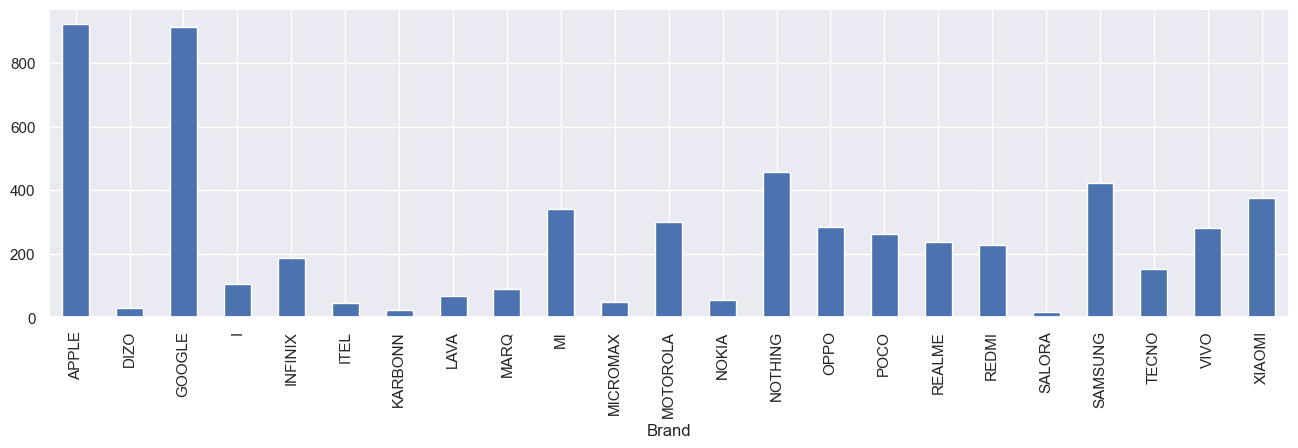

In [10]:
df2 = dataclean[['Brand', 'original price(SGD)']].copy()
df2= df2.groupby(['Brand']).mean()
df2.plot.bar(figsize = (16, 4), legend = False)

In [11]:
new = dataclean["display"].str.split(" ", n = 1, expand = True)
#displaylength
dataclean["display(cm)"]= new[0]
 
#deleting unneccesary data
dataclean["delete"]= new[1]
#deleted display info (note that this is in cm)
dataclean = dataclean.drop(['delete','display'],axis = 'columns')
dataclean['display(cm)'] = dataclean['display(cm)'].astype(float)

dataclean.head()

,stars,memory,camara_info,battery,processor,original price(SGD),phone name,Brand,display(cm)
1,4.1,8 MB RAM | 0 GB ROM | Expandable Upto 16 GB,0MP | 0MP Front Camera,800 mAh Battery,0 0 0 208MHz Processor,32.0,SAMSUNG GURU MUSIC 2,SAMSUNG,5.08
247,4.1,4 MB RAM | 4 MB ROM | Expandable Upto 32 GB,1200 mAh Lithium Ion Battery,7 Days Battery Backup with 1200mAh with Super ...,9 Indian Input Language Support,16.0,itel it2163S,ITEL,4.57
290,4.1,4 MB RAM | 4 MB ROM | Expandable Upto 32 GB,0.3MP Rear Camera,3000 mAh Battery,ARM9 architecture (Single core) Processor,26.0,itel Muzik 400,ITEL,6.10
317,4.6,4GB RAM |128 GB ROM,12MP + 12MP | 12MP Front Camera,A14 Bionic Chip with Next Generation Neural En...,Ceramic Shield,928.0,APPLE iPhone 12,APPLE,15.49
322,4.5,4GB RAM |256 GB ROM,12MP + 12MP | 12MP Front Camera,A14 Bionic Chip with Next Generation Neural En...,Ceramic Shield,919.0,APPLE iPhone 12 mini,APPLE,13.72


To exclude phones and brands that would otherwise not be a consideration due to low price and lack of features or not even being a smartphone, such as phones from itel, we decided to set a minimum price of $150. 


In [12]:
#Drop < $150 (badphones + dumbphones)
dataclean = dataclean[dataclean['original price(SGD)'] >= 150]

In [13]:
new = dataclean["camara_info"].str.split("|", n = 1, expand = True)
 
#rear camera
dataclean["rear camera(MP)"]= new[0]
 
#front camera
dataclean["front camera(MP)"]= new[1]
#deleted price
dataclean = dataclean.drop(['camara_info'],axis = 'columns')
dataclean.loc[dataclean['rear camera(MP)'].str.contains('Battery',),'rear camera(MP)'] = "0"

dataclean.head()

,stars,memory,battery,processor,original price(SGD),phone name,Brand,display(cm),rear camera(MP),front camera(MP)
317,4.6,4GB RAM |128 GB ROM,A14 Bionic Chip with Next Generation Neural En...,Ceramic Shield,928.0,APPLE iPhone 12,APPLE,15.49,12MP + 12MP,12MP Front Camera
322,4.5,4GB RAM |256 GB ROM,A14 Bionic Chip with Next Generation Neural En...,Ceramic Shield,919.0,APPLE iPhone 12 mini,APPLE,13.72,12MP + 12MP,12MP Front Camera
323,4.2,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,5000 mAh Li-ion Polymer Battery,Dimensity 810 Processor,212.0,Infinix Hot 20 5G,INFINIX,16.76,50MP + AI Lens,8MP Front Camera
324,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,5000 mAh Li-ion Polymer Battery,Dimensity 810 Processor,179.0,Infinix HOT 20 5G,INFINIX,16.76,50MP + AI Lens,8MP Front Camera
328,4.0,4 GB RAM | 128 GB ROM | Expandable Upto 512 GB,6000 mAh Lithium-ion Battery,Exynos 850 Processor,187.0,SAMSUNG Galaxy F12,SAMSUNG,16.55,48MP + 5MP + 2MP + 2MP,8MP Front Camera


In [14]:
#Drop Phones without RAM data
dataclean = dataclean[dataclean['memory'].str.contains("RAM")]

new = dataclean["memory"].str.split("|", n = 2, expand = True)
 
#RAM
dataclean["RAM(GB)"]= new[0]
 
#ROM
dataclean["ROM"]= new[1]

#Expendable
dataclean["Expandable"] = new[2]
#deleted info
dataclean = dataclean.drop (['memory'],axis = "columns")
#make new df & do multiplication on it to change from MB to GB, can use copy col
df = dataclean[dataclean['RAM(GB)'].str.contains('MB')]
df['RAM(GB)'] = df['RAM(GB)'].str.replace('\D', '', regex=True)
df['RAM(GB)'] = df['RAM(GB)'].astype(float)
df['RAM(GB)'] = df['RAM(GB)'].multiply(0.001)


dataclean = dataclean[dataclean["RAM(GB)"].str.contains("MB") == False]
dataclean['RAM(GB)'] = dataclean['RAM(GB)'].str.replace('\D', '', regex=True)
dataclean['RAM(GB)'] = pd.to_numeric(dataclean['RAM(GB)'], errors='coerce')
dtaclean = dataclean.replace(np.nan, 0, regex=True)

dataclean = pd.concat([df,dataclean])
dataclean.head()



,stars,battery,processor,original price(SGD),phone name,Brand,display(cm),rear camera(MP),front camera(MP),RAM(GB),ROM,Expandable
317,4.6,A14 Bionic Chip with Next Generation Neural En...,Ceramic Shield,928.0,APPLE iPhone 12,APPLE,15.49,12MP + 12MP,12MP Front Camera,4.0,128 GB ROM,None
322,4.5,A14 Bionic Chip with Next Generation Neural En...,Ceramic Shield,919.0,APPLE iPhone 12 mini,APPLE,13.72,12MP + 12MP,12MP Front Camera,4.0,256 GB ROM,None
323,4.2,5000 mAh Li-ion Polymer Battery,Dimensity 810 Processor,212.0,Infinix Hot 20 5G,INFINIX,16.76,50MP + AI Lens,8MP Front Camera,6.0,128 GB ROM,Expandable Upto 1 TB
324,4.3,5000 mAh Li-ion Polymer Battery,Dimensity 810 Processor,179.0,Infinix HOT 20 5G,INFINIX,16.76,50MP + AI Lens,8MP Front Camera,4.0,64 GB ROM,Expandable Upto 1 TB
328,4.0,6000 mAh Lithium-ion Battery,Exynos 850 Processor,187.0,SAMSUNG Galaxy F12,SAMSUNG,16.55,48MP + 5MP + 2MP + 2MP,8MP Front Camera,4.0,128 GB ROM,Expandable Upto 512 GB


In [15]:
new = dataclean["battery"].str.split("mAh", n = 1, expand = True)


#battery
dataclean["battery(mAh)1"]= new[0]
 
#nope
dataclean["noneed"]= new[1]
#to get rid of the strings in front of some of the data
new = dataclean["battery(mAh)1"].str.split(" ", n = 1, expand = True)
dataclean["nope"]=new[0]
dataclean["battery(mAh)"]=new[1]
#to get rid of strings
dataclean['battery(mAh)1'] = pd.to_numeric(dataclean['battery(mAh)1'], errors='coerce')
dataclean['battery(mAh)'] = dataclean['battery(mAh)'].str.replace('\D', '', regex=True)
dataclean = dataclean.fillna('0')
dataclean['battery(mAh)1'] = dataclean['battery(mAh)1'].astype(str)
#merge have to be string
dataclean["Battery(mAh)"] = dataclean[["battery(mAh)1", "battery(mAh)"]].apply("".join, axis=1)
#change back to float
dataclean['Battery(mAh)'] = dataclean['Battery(mAh)'].astype(float)


dataclean = dataclean.drop(['processor'],axis = "columns")
#deleted info
dataclean = dataclean.drop (['battery','noneed','nope','battery(mAh)1','battery(mAh)' ],axis = "columns")
dataclean.head()


,stars,original price(SGD),phone name,Brand,display(cm),rear camera(MP),front camera(MP),RAM(GB),ROM,Expandable,Battery(mAh)
317,4.6,928.0,APPLE iPhone 12,APPLE,15.49,12MP + 12MP,12MP Front Camera,4.0,128 GB ROM,0,0.0
322,4.5,919.0,APPLE iPhone 12 mini,APPLE,13.72,12MP + 12MP,12MP Front Camera,4.0,256 GB ROM,0,0.0
323,4.2,212.0,Infinix Hot 20 5G,INFINIX,16.76,50MP + AI Lens,8MP Front Camera,6.0,128 GB ROM,Expandable Upto 1 TB,5000.0
324,4.3,179.0,Infinix HOT 20 5G,INFINIX,16.76,50MP + AI Lens,8MP Front Camera,4.0,64 GB ROM,Expandable Upto 1 TB,5000.0
328,4.0,187.0,SAMSUNG Galaxy F12,SAMSUNG,16.55,48MP + 5MP + 2MP + 2MP,8MP Front Camera,4.0,128 GB ROM,Expandable Upto 512 GB,6000.0


In [16]:
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 317 to 892
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stars                151 non-null    float64
 1   original price(SGD)  151 non-null    float64
 2   phone name           151 non-null    object 
 3   Brand                151 non-null    object 
 4   display(cm)          151 non-null    float64
 5   rear camera(MP)      151 non-null    object 
 6   front camera(MP)     151 non-null    object 
 7   RAM(GB)              151 non-null    float64
 8   ROM                  151 non-null    object 
 9   Expandable           151 non-null    object 
 10  Battery(mAh)         151 non-null    float64
dtypes: float64(5), object(6)
memory usage: 14.2+ KB


In [17]:
star = pd.DataFrame(dataclean['stars']) 
price = pd.DataFrame(dataclean['original price(SGD)'])   
display = pd.DataFrame(dataclean['display(cm)'])

In [18]:
def reg(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)

    print(f"Intercept: {linreg.intercept_}\nCoefficient: {linreg.coef_}")
    # Plotting Train

    y_train_pred = linreg.predict(x_train)

    f = plt.figure(figsize = (16,8))
    plt.scatter(x_train, y_train, color = "g")
    plt.scatter(x_train, y_train_pred, color = "r")
    plt.show()

    # Plotting Test

    y_test_pred = linreg.predict(x_test)

    f = plt.figure(figsize = (16,8))
    plt.scatter(x_test, y_test, color = "b")
    plt.scatter(x_test, y_test_pred, color = "r")
    plt.show()

    print(f"{x.columns} VS {y.columns}")
    mse = mean_squared_error(y_train, y_train_pred)
    print(f"Goodness of Fit of Train\nVariance: {linreg.score(x_train, y_train)}\nMSE: {mse} \nRoot MSE: {np.sqrt(mse)}\n")

    mse = mean_squared_error(y_test, y_test_pred)
    print(f"Goodness of Fit of Test \nVariance: {linreg.score(x_test, y_test)}\nMSE: {mse} \nRoot MSE: {np.sqrt(mse)}\n")   


In [19]:
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 317 to 892
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stars                151 non-null    float64
 1   original price(SGD)  151 non-null    float64
 2   phone name           151 non-null    object 
 3   Brand                151 non-null    object 
 4   display(cm)          151 non-null    float64
 5   rear camera(MP)      151 non-null    object 
 6   front camera(MP)     151 non-null    object 
 7   RAM(GB)              151 non-null    float64
 8   ROM                  151 non-null    object 
 9   Expandable           151 non-null    object 
 10  Battery(mAh)         151 non-null    float64
dtypes: float64(5), object(6)
memory usage: 14.2+ KB


Intercept: [-657.53435115]
Coefficient: [[229.61832061]]


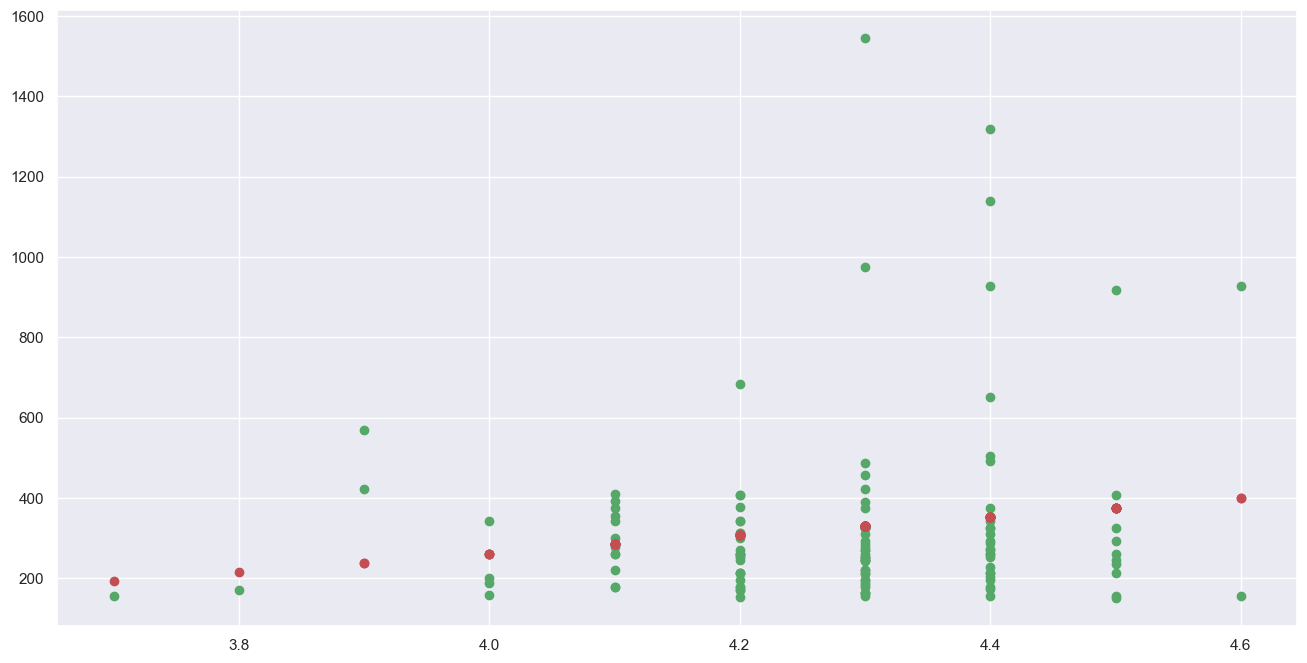

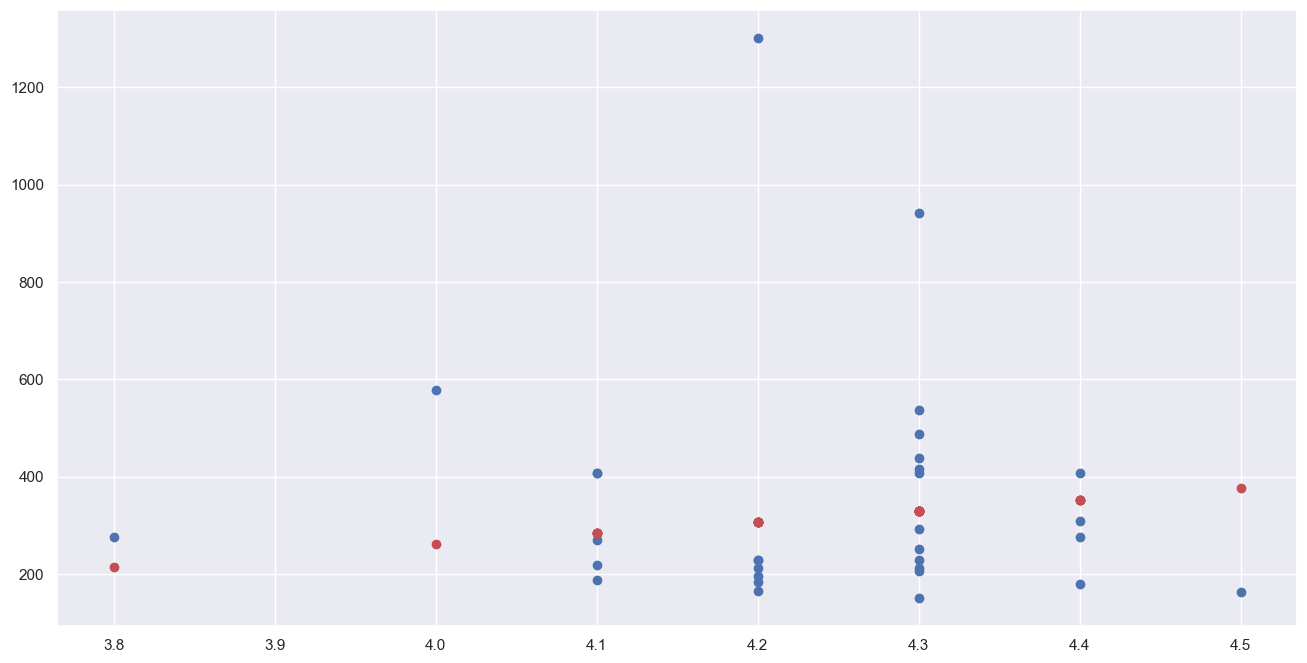

Index(['stars'], dtype='object') VS Index(['original price(SGD)'], dtype='object')
Goodness of Fit of Train
Variance: 0.024201813441083964
MSE: 49507.83549618321 
Root MSE: 222.5035628842451

Goodness of Fit of Test 
Variance: -0.048114679405373506
MSE: 59391.05294074523 
Root MSE: 243.70279633345456



In [20]:
x = star
y = price
reg(x,y)

In [21]:
import re

new = dataclean["rear camera(MP)"].str.split("+", expand = True)

    
dataclean["best rear camera(MP)"]= new[0]
dataclean["best rear camera(MP)"] = dataclean["best rear camera(MP)"].str.replace('[^0-9.]', '', regex=True)
dataclean["best rear camera(MP)"] = dataclean["best rear camera(MP)"].astype(float)

pattern = re.compile(r'mp', re.IGNORECASE)
dataclean["no of rear cameras"] = dataclean["rear camera(MP)"].str.count(pattern)

dataclean.head()

,stars,original price(SGD),phone name,Brand,display(cm),rear camera(MP),front camera(MP),RAM(GB),ROM,Expandable,Battery(mAh),best rear camera(MP),no of rear cameras
317,4.6,928.0,APPLE iPhone 12,APPLE,15.49,12MP + 12MP,12MP Front Camera,4.0,128 GB ROM,0,0.0,12.0,2
322,4.5,919.0,APPLE iPhone 12 mini,APPLE,13.72,12MP + 12MP,12MP Front Camera,4.0,256 GB ROM,0,0.0,12.0,2
323,4.2,212.0,Infinix Hot 20 5G,INFINIX,16.76,50MP + AI Lens,8MP Front Camera,6.0,128 GB ROM,Expandable Upto 1 TB,5000.0,50.0,1
324,4.3,179.0,Infinix HOT 20 5G,INFINIX,16.76,50MP + AI Lens,8MP Front Camera,4.0,64 GB ROM,Expandable Upto 1 TB,5000.0,50.0,1
328,4.0,187.0,SAMSUNG Galaxy F12,SAMSUNG,16.55,48MP + 5MP + 2MP + 2MP,8MP Front Camera,4.0,128 GB ROM,Expandable Upto 512 GB,6000.0,48.0,4


<AxesSubplot:xlabel='0', ylabel='0'>

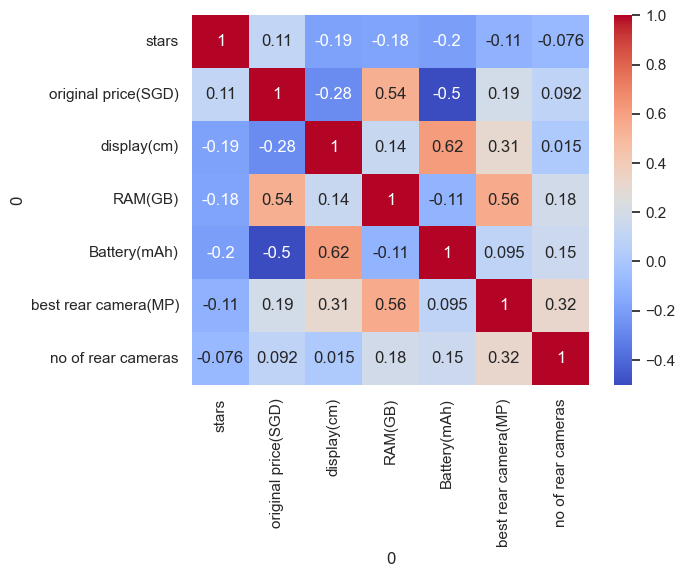

In [22]:
corr = dataclean.corr()
sb.heatmap(corr, annot=True, cmap='coolwarm')

In [23]:
dataclean["RAM(GB)"] = dataclean["RAM(GB)"].astype(float)
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 317 to 892
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   stars                 151 non-null    float64
 1   original price(SGD)   151 non-null    float64
 2   phone name            151 non-null    object 
 3   Brand                 151 non-null    object 
 4   display(cm)           151 non-null    float64
 5   rear camera(MP)       151 non-null    object 
 6   front camera(MP)      151 non-null    object 
 7   RAM(GB)               151 non-null    float64
 8   ROM                   151 non-null    object 
 9   Expandable            151 non-null    object 
 10  Battery(mAh)          151 non-null    float64
 11  best rear camera(MP)  151 non-null    float64
 12  no of rear cameras    151 non-null    int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 16.5+ KB


<AxesSubplot:xlabel='0', ylabel='0'>

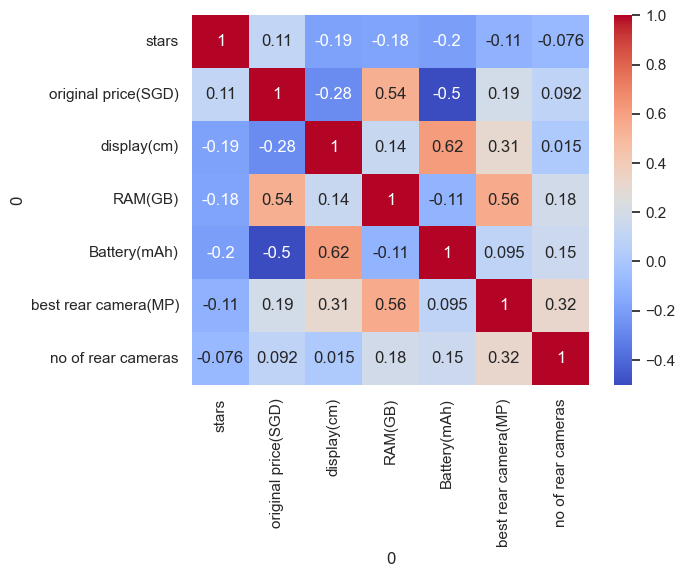

In [24]:
corr = dataclean.corr()
sb.heatmap(corr, annot=True, cmap='coolwarm')



As seen in this correlation heat map, the function that is the closest to stars is the display at 0.45 followed by the price at 0.42. This could be explained by the fact that having a larger display would mean a bigger image as well as more room for functions. One thing that we would like to point out is that the display affects a lot of the other functions as well, from the battery at 0.88, followed by the best rear camera at 0.63 and then the no of rear cameras at 0.57. As mentioned before, the larger the display, the larger the area that can be worked on for more functions. Hence, as shown in the heat map, we can see that display is the most important factor that affects the customers satisfaction followed by the price of the phone.

In [25]:
dataclean.tail()  

,stars,original price(SGD),phone name,Brand,display(cm),rear camera(MP),front camera(MP),RAM(GB),ROM,Expandable,Battery(mAh),best rear camera(MP),no of rear cameras
877,4.5,151.0,realme C31,REALME,16.56,13MP + 2MP + 0.3MP,5MP Front Camera,3.0,32 GB ROM,Expandable Upto 1 TB,5000.0,13.0,3
881,4.5,163.0,realme C33,REALME,16.51,50MP + 0.3MP,5MP Front Camera,4.0,64 GB ROM,Expandable Upto 1 TB,5000.0,50.0,2
884,4.0,200.0,Infinix Hot 12 Pro,INFINIX,16.76,50 MP + Depth Lens,8MP Front Camera,8.0,128 GB ROM,Expandable Upto 256 GB,5000.0,50.0,1
888,4.1,179.0,realme C25_Y,REALME,16.51,50MP + 2MP + 2MP,8MP Front Camera,4.0,64 GB ROM,0,5000.0,50.0,3
892,4.4,212.0,realme C35,REALME,16.76,50MP + 2MP + 0.3MP,8MP Front Camera,4.0,128 GB ROM,Expandable Upto 1 TB,5000.0,50.0,3


As seen above for the RAM data vs the original price, the goodness of fit for variance at -0.009453 and the MSE at 287295708 shows that the RAM and price is not a good fit between the model's prediction and the actual observation. Variance(R^2) measures the proportion of the total variation in the dependent variable that can be explained by the independent variables in the model while MSE measures the average squared difference between the predicted and actual values. The lower the MSE, the better the fit. The higher the Variance, the better the fit. Unfortunately, for both our variance and MSE, they prove that the RAM and price are not a good fit of the model.

In [26]:
df2 = dataclean[['no of rear cameras', 'original price(SGD)']].copy()
df2= df2.groupby(['no of rear cameras']).mean()
df2.head()

,original price(SGD)
no of rear cameras,
1,189.600000
2,315.128205
3,363.719512
4,284.350000


As seen above, the price of the phones with more rear cameras tend to cost more than those with lesser rear cameras. 
Phones with 0 cameras have very low pricing and are typically non-smartphone.
If one were to make a decision between 2 and 3 rear cameras, it may be better to choose one with 3 rear cameras as the price range is very small and thus may be more worth it to buy the one with the 3 rear cameras.

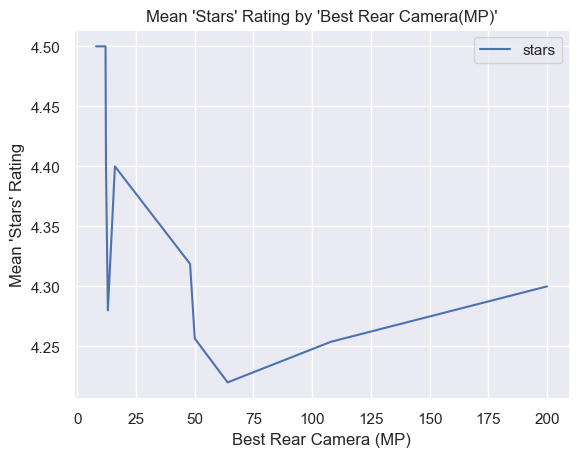

In [27]:
df3 = dataclean[['best rear camera(MP)', 'stars']].copy()
df3= df3.groupby(['best rear camera(MP)']).mean()

# Create a line plot of the mean 'stars' rating for each value of 'best rear camera(MP)'
df3.plot(kind='line', y='stars')

# Add a title and labels for the x- and y-axes
plt.title("Mean 'Stars' Rating by 'Best Rear Camera(MP)'")
plt.xlabel("Best Rear Camera (MP)")
plt.ylabel("Mean 'Stars' Rating")

# Display the plot
plt.show()

The Megapixels of the rear camera does seem to affect the ratings of the camera
It is possible that for 75MP and above, customers are looking for good cameras and thus rate accordingly, while for those below 75MP, customers may not be interested in camera quality and are more interested in other features of a phone and thus the rating does not show any clear relationship 

In [28]:
df3 = dataclean[['no of rear cameras', 'stars']].copy()
df3= df3.groupby(['no of rear cameras']).mean()
df3


,stars
no of rear cameras,
1,4.230000
2,4.292308
3,4.276829
4,4.210000


From the above table it can be seen that generally customers are most satisfied with 2 or 3 cameras, but dipping at 4.
As each camera is generally used for different purposes, eg. macro or zoom, it could be that camera number is not as important as the earlier quality of the camera.

<AxesSubplot:xlabel='no of rear cameras'>

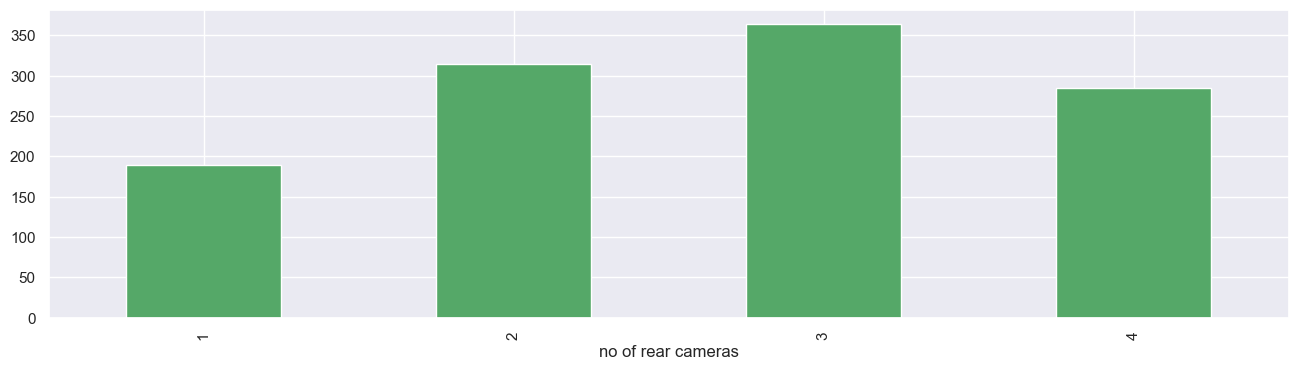

In [29]:
df2 = df2.loc[df2["original price(SGD)"] >= 150 ]

df2.plot(kind='bar', legend = False , stacked=True, color= 'g', figsize = (16, 4) )


As seen above this is the bar graph comparison of the brands and the star rating. Since many people may view their satisfaction of the product based on the brand, we decided to use this bar graph to see whether it is true or not. As expected, many people are more satisfied using the Apple brand as it is associated with higher value and societal standings.

### As seen in this bar graph, the price of the phone is also related to the brand of the phone. As seen, Apple cost more than other brands followed by Google.

,stars
Brand,
APPLE,4.550000
GOOGLE,4.400000
INFINIX,4.233333
MI,4.200000
MICROMAX,4.100000


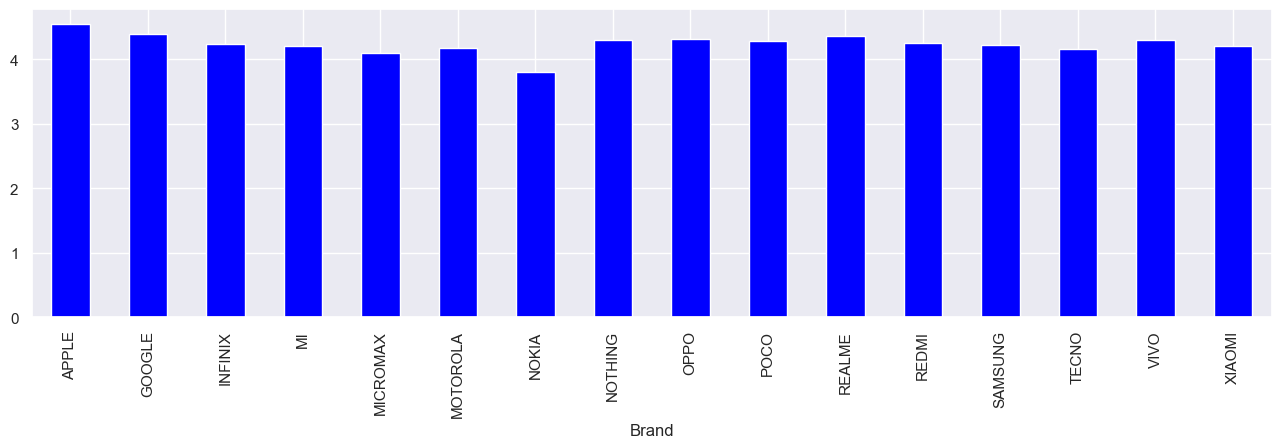

In [30]:

from ipywidgets.widgets.widget_int import Color
#create another dataframe for the Brand and stars to do bar graph
from matplotlib import colormaps
df1 = dataclean[['Brand', 'stars','original price(SGD)']].copy()
df1 = df1.groupby(['Brand']).mean()
df1 = df1.loc[df1["original price(SGD)"] >= 150 ]
df1= df1.drop(['original price(SGD)'],axis = 'columns')

df1.plot.bar(figsize = (16, 4), legend = False, colormap= 'winter')
df1.head()

# ram/price linreg BELOW CAN PROB DELETE

Intercept: [-13.76123572]
Coefficient: [[55.86603402]]


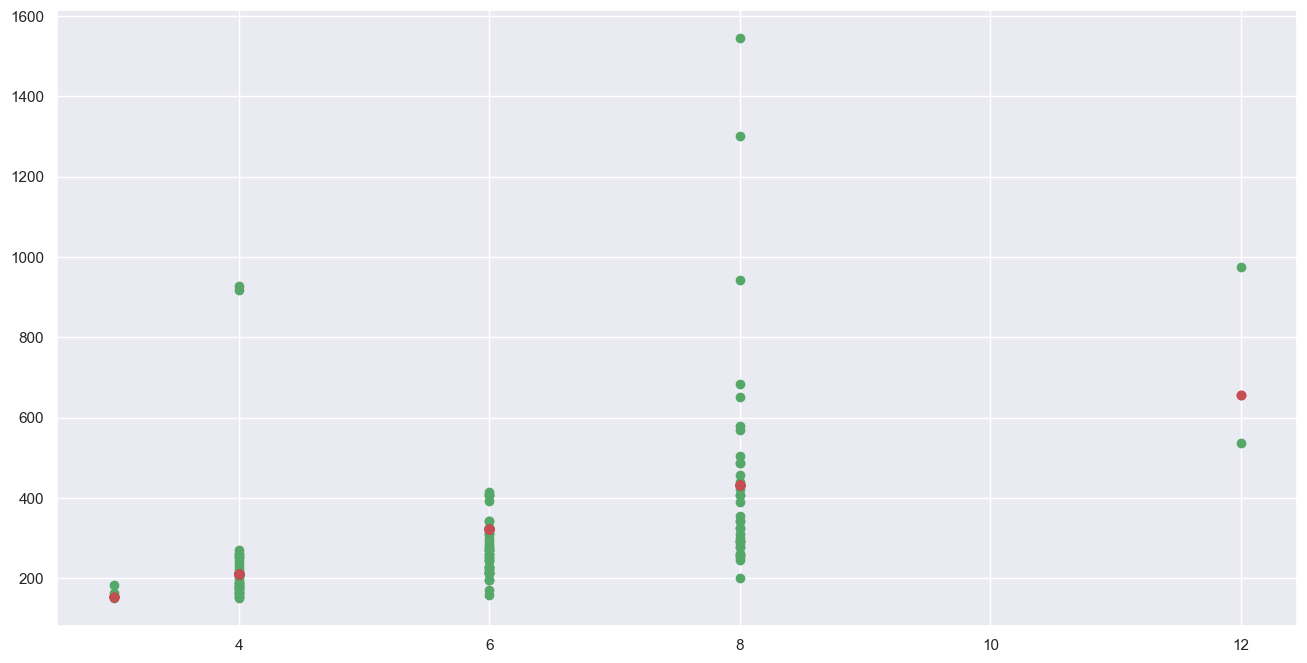

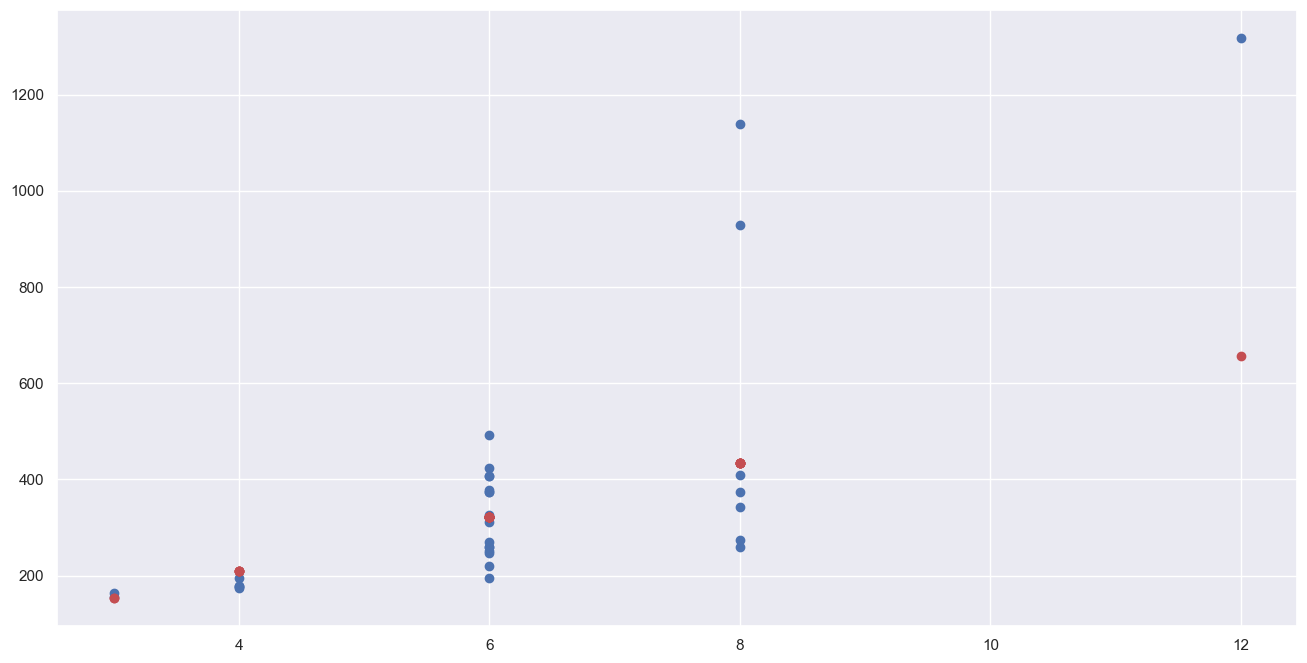

Index(['RAM(GB)'], dtype='object') VS Index(['original price(SGD)'], dtype='object')
Goodness of Fit of Train
Variance: 0.2278642897986276
MSE: 35755.00258846164 
Root MSE: 189.08993254126895

Goodness of Fit of Test 
Variance: 0.39034453011414827
MSE: 43984.407806202864 
Root MSE: 209.72459990712312



In [31]:
ram = pd.DataFrame(dataclean['RAM(GB)']) 
ori = pd.DataFrame(dataclean['original price(SGD)'])   
reg(ram,ori)

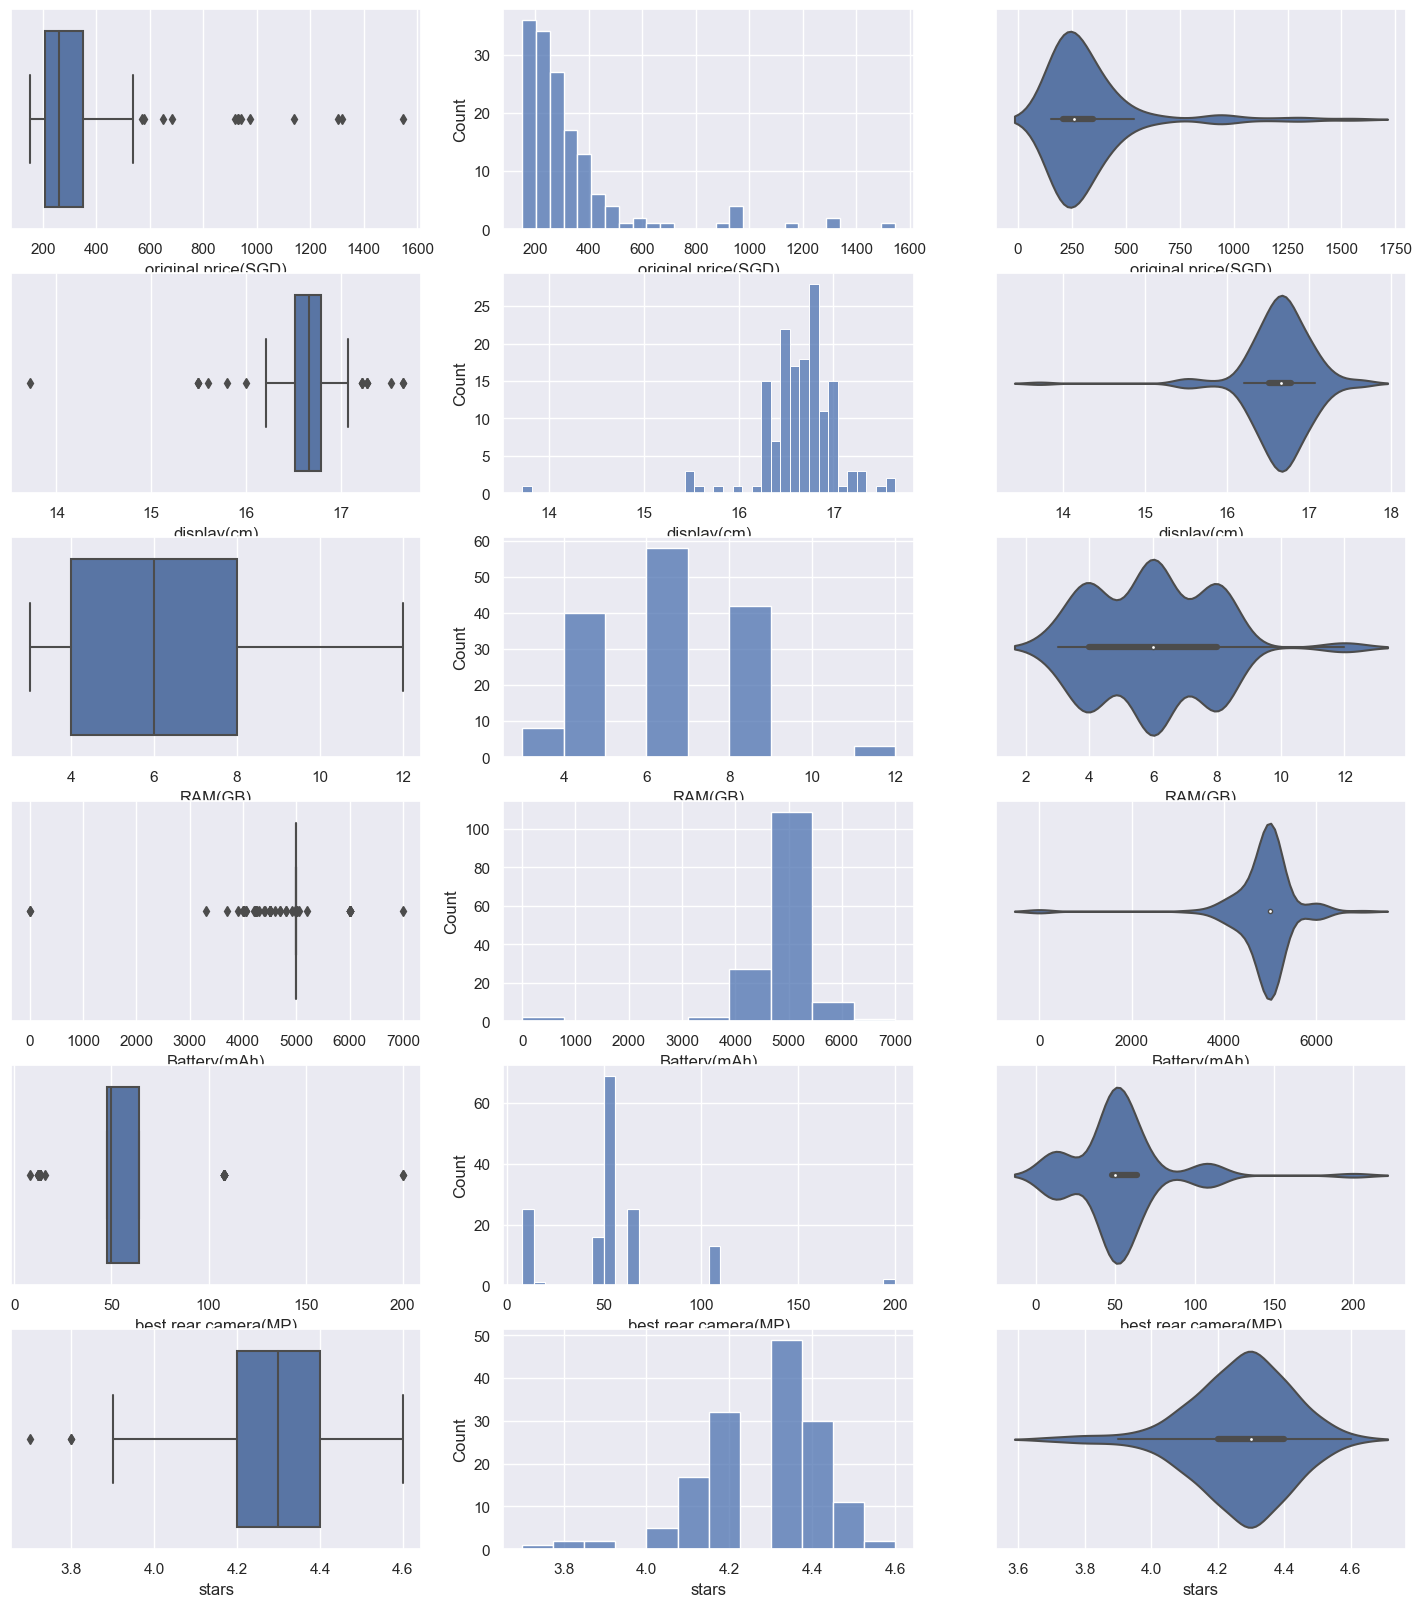

In [32]:
dc = pd.DataFrame(dataclean[['original price(SGD)', 'display(cm)', 'RAM(GB)', 'Battery(mAh)', 'best rear camera(MP)', 'stars']])
dc.head()

# Draw the distributions of all variables using Seaborn
f, axes = plt.subplots(6, 3, figsize=(18, 20))

count = 0
for var in dc.columns:
    sb.boxplot(x=dc[var], ax=axes[count,0])
    sb.histplot(x=dc[var], ax=axes[count,1])
    sb.violinplot(x=dc[var], ax=axes[count,2])
    count += 1

In [33]:
dataclean['RAM(GB)'].max()

12.0

In [34]:
rows = dataclean[dataclean['RAM(GB)'] == 256.0]
print(rows)

Empty DataFrame
Columns: [stars, original price(SGD), phone name, Brand, display(cm), rear camera(MP), front camera(MP), RAM(GB), ROM, Expandable, Battery(mAh), best rear camera(MP), no of rear cameras]
Index: []


## To get a baseline to measure the accuracy of our model, we decided to use the naive prediction of just using the mean as a prediction of rating of phone

Our baseline MSE calculated as follows:

In [35]:
# Calculate the mean of the dependent variable
mean_y = dataclean['stars'].mean()

# Calculate the number of observations
n = len(dataclean)

# Create a NumPy array of length n containing the mean of the dependent variable
y_pred = np.full((n,), mean_y)

# Calculate the MSE
mse = np.mean((dataclean['stars'] - y_pred) ** 2)
print("Baseline for Linear Regression Predictions:", mse)

Baseline for Linear Regression Predictions: 0.022541116617692227


In [43]:
y = dataclean['stars']
X = dataclean[['display(cm)','best rear camera(MP)','no of rear cameras','Battery(mAh)','RAM(GB)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [45]:
# Fit the linear regression model
model = LinearRegression().fit(X_train, y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Print the coefficients and intercept of the model
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('R^2:', model.score(X_test, y_test))
print('MSE:',mean_squared_error(y_test, y_pred))

Coefficients:  [-2.68736088e-02  4.82288043e-04 -7.58548536e-03 -4.15456503e-05
 -2.12218466e-02]
Intercept:  5.041608523838886
R^2: -0.05375396762248008
MSE: 0.01971045336944822


In [50]:
from sklearn.linear_model import Lasso

#Hyperparameter tuning:
lassomodels = dict()
for a in range(0,1001):
    # Fit the linear regression model from 0 to 10 in steps of 0.01
    lasso_model = Lasso(alpha=a/100).fit(X_train, y_train)
    
    # Save the coefficients and intercept of the model
    y_pred = lasso_model.predict(X_test)
    lassomodels[mean_squared_error(y_test, y_pred)] = [lasso_model.coef_,lasso_model.intercept_,a/100,lasso_model.score(X_test, y_test)]

# Get the 5 best models from the dictionary (by MSE)
largest_keys = sorted(lassomodels)[:5]


# Print the metrics of the top 5
for key in largest_keys:
    print("-------------------ALPHA ",lassomodels[key][2],"-----------------------------")
    print('MSE:', key)
    print('Coefficients: ', lassomodels[key][0])
    print('Intercept: ', lassomodels[key][1])
    print('R^2 Score: ', lassomodels[key][3])

    
    
    



C:\Users\Arjay\AppData\Local\Temp\ipykernel_12564\435449958.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model = Lasso(alpha=a/100).fit(X_train, y_train)
G:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
G:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.189e+00, tolerance: 2.689e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


-------------------ALPHA  0.02 -----------------------------
MSE: 0.019233402078753986
Coefficients:  [-0.00000000e+00  0.00000000e+00 -0.00000000e+00 -4.88255066e-05
 -1.20874264e-02]
Intercept:  4.580772867270336
R^2 Score:  -0.028250003766039145
-------------------ALPHA  0.03 -----------------------------
MSE: 0.019242424679895113
Coefficients:  [-0.00000000e+00 -1.22687344e-04 -0.00000000e+00 -4.77227500e-05
 -7.71901221e-03]
Intercept:  4.555966761383698
R^2 Score:  -0.028732367188763597
-------------------ALPHA  0.01 -----------------------------
MSE: 0.019356587317797783
Coefficients:  [-0.00000000e+00  1.58689338e-04 -0.00000000e+00 -5.01598422e-05
 -1.68355298e-02]
Intercept:  4.607069194913025
R^2 Score:  -0.03483569370233108
-------------------ALPHA  0.04 -----------------------------
MSE: 0.019365430872748533
Coefficients:  [-0.00000000e+00 -2.79812910e-04 -0.00000000e+00 -4.63984225e-05
 -2.98739988e-03]
Intercept:  4.52973491021975
R^2 Score:  -0.035308485014766466
------

## We chose lasso as it is better with smaller numbers of independent variables like we have, here, and when several variables may be useless, as is with the poor correlation of our variables

## In our hyperparameter tuning of Lasso Regression, it seems that the dataset fits better with lower alpha values

## In terms of MSE, it is also slightly better than plain Linear Regression
LinReg: ~ 0.0197  
Lasso: ~ 0.0192 (BEST)  
Ridge: ~ 0.0196  

References for Lasso/Ridge https://www.youtube.com/watch?v=eGXw9n7AnV4

In [53]:
from sklearn.linear_model import Lasso

#Hyperparameter tuning:
ridgemodels = dict()
for a in range(0,1001):
    # Fit the linear regression model from 0 to 10 in steps of 0.01
    ridge_model = Ridge(alpha=a/100).fit(X_train, y_train)
    
    # Save the coefficients and intercept of the model
    y_pred = ridge_model.predict(X_test)
    ridgemodels[mean_squared_error(y_test, y_pred)] = [ridge_model.coef_,ridge_model.intercept_,a/100,ridge_model.score(X_test, y_test)]

# Get the 5 best models from the dictionary (by MSE)
largest_keys = sorted(ridgemodels)[:5]


# Print the metrics of the top 5
for key in largest_keys:
    print("-------------------ALPHA ",ridgemodels[key][2],"-----------------------------")
    print('MSE:', key)
    print('Coefficients: ', ridgemodels[key][0])
    print('Intercept: ', ridgemodels[key][1])
    print('R^2 Score: ', ridgemodels[key][3])


-------------------ALPHA  10.0 -----------------------------
MSE: 0.019608005405457395
Coefficients:  [-1.35301533e-02  3.97577043e-04 -5.40168203e-03 -4.61406548e-05
 -2.06395103e-02]
Intercept:  4.837164704552354
R^2 Score:  -0.04827692726695432
-------------------ALPHA  9.99 -----------------------------
MSE: 0.019608075009250735
Coefficients:  [-1.35368416e-02  3.97635864e-04 -5.40296877e-03 -4.61384492e-05
 -2.06402149e-02]
Intercept:  4.837269763766023
R^2 Score:  -0.04828064840274049
-------------------ALPHA  9.98 -----------------------------
MSE: 0.01960814464203516
Coefficients:  [-1.35435365e-02  3.97694714e-04 -5.40425646e-03 -4.61362412e-05
 -2.06409195e-02]
Intercept:  4.837374923155207
R^2 Score:  -0.04828437108843864
-------------------ALPHA  9.97 -----------------------------
MSE: 0.019608214303854295
Coefficients:  [-1.35502382e-02  3.97753591e-04 -5.40554510e-03 -4.61340307e-05
 -2.06416239e-02]
Intercept:  4.837480182869239
R^2 Score:  -0.04828809532638134
---------

## DO WE NEED THE BELOW ONE? MIGHT WANT TO USE ABOVE IDK

Intercept of Regression 	: b =  1.6300469640384576
Coefficients of Regression 	: a =  [-6.23985960e-03  1.96206856e-04 -3.74700224e-03 -9.94730089e-06
 -4.88040996e-03]



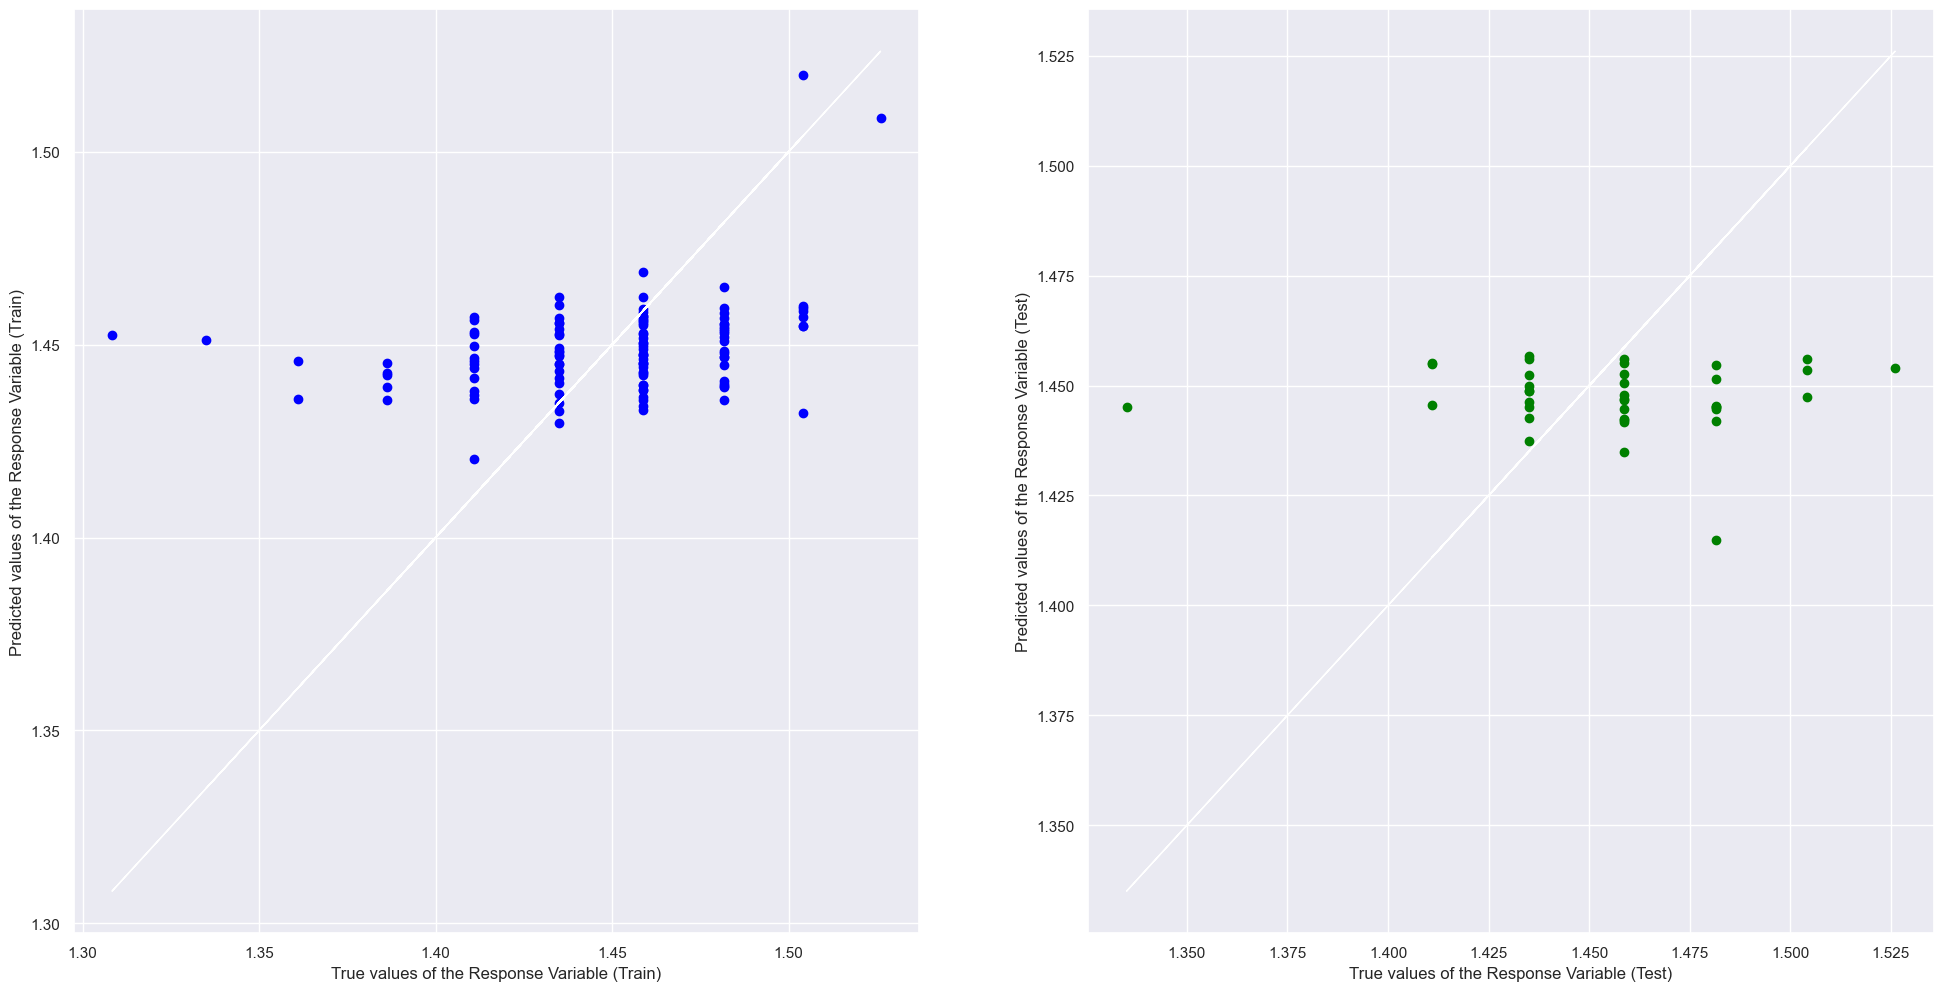

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.11376518212503417
Mean Squared Error (MSE) 	: 0.0011720438182955468

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.12773003535687266
Mean Squared Error (MSE) 	: 0.0012540698507324866

Coefficients:  [-5.04799775e-03  6.38267331e-05 -1.28421950e-03 -8.91626496e-06
 -4.01023992e-03]
Intercept:  1.6022756389472095
R^2: 0.07811336097762778


In [39]:
def reg2 (X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

  # Linear Regression using Train Data
  linreg = LinearRegression()         # create the linear regression object
  linreg.fit(X_train, y_train)        # train the linear regression model

  # Coefficients of the Linear Regression line
  print('Intercept of Regression \t: b = ', linreg.intercept_)
  print('Coefficients of Regression \t: a = ', linreg.coef_)
  print()

  

  # Predict Response corresponding to Predictors
  y_train_pred = linreg.predict(X_train)
  y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
  f, axes = plt.subplots(1, 2, figsize=(24, 12))
  axes[0].scatter(y_train, y_train_pred, color = "blue")
  axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
  axes[0].set_xlabel("True values of the Response Variable (Train)")
  axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
  axes[1].scatter(y_test, y_test_pred, color = "green")
  axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
  axes[1].set_xlabel("True values of the Response Variable (Test)")
  axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
  plt.show()

  # Check the Goodness of Fit (on Train Data)
  print("Goodness of Fit of Model \tTrain Dataset")
  print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
  print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
  print()

  # Check the Goodness of Fit (on Test Data)
  print("Goodness of Fit of Model \tTest Dataset")
  print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
  print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
  print()
y = np.log(dataclean['stars'])
linreg = LinearRegression()    
# Define the independent variables
X = dataclean[['display(cm)','best rear camera(MP)','no of rear cameras','Battery(mAh)','RAM(GB)']]
reg2(X,y)
# Fit the linear regression model
model = LinearRegression().fit(X,y)

# Print the coefficients and intercept of the model
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('R^2:', model.score(X, y))

R^2 and MSE are the metrics we use to determine the accuracy of the regression model(s).  
A higher R^2 value and lower MSE generally mean the model produces good predictions.  
